# Goal:

The goal with this project is to analyze **_Latency Variations_** across different geographic regions and cloud providers

# Data Loading & Cleaning

In the following section, we are importing and making use of `pandas.read_csv` method in order to read and load the data from a spreadsheet file.
For the sake of getting a better overview of the existing columns, we set the `max_columns` option to `None` which allows all columns to be viewed. In our case, this didn't cause any issues because we only have 11 columns.

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

data = pd.read_csv("./gmcsd.csv")
data.head()

,Application ID,Microservice Name,Cloud Provider,Region,Resource Utilization (%),Latency (ms),Cost ($),Deployment Time (hrs),Success Rate (%),Data Transfer (GB),Environment
0,1,Service C,IBM Cloud,Asia-Pacific,74.36,55.54,1062.99,21.93,92.65,445.93,Testing
1,2,Service C,Google Cloud,Asia-Pacific,85.06,52.45,4580.71,14.86,98.20,115.22,Production
2,3,Service D,Azure,US-East,64.70,49.49,3333.55,14.62,93.70,654.32,Testing
3,4,Service B,Azure,US-East,72.36,46.28,1337.02,15.06,93.12,518.12,Development
4,5,Service D,Azure,US-East,84.29,55.69,2043.29,21.93,94.62,691.58,Development


## Check for missing values

We used the following line of code to see whether or not there were any missing values in the data. And luckily, there were none.

In [2]:
data.isnull().sum()

Application ID              0
Microservice Name           0
Cloud Provider              0
Region                      0
Resource Utilization (%)    0
Latency (ms)                0
Cost ($)                    0
Deployment Time (hrs)       0
Success Rate (%)            0
Data Transfer (GB)          0
Environment                 0
dtype: int64

## Check for duplicates

There's always the possibility of having duplicate data and with that in mind, we used the `DataFrame.duplicated` method in order to check whether there is any duplication in the data set.

In [3]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
399995    False
399996    False
399997    False
399998    False
399999    False
Length: 400000, dtype: bool

## Check data types

After looking for duplicates, we observed the datatypes that were being used in order to decide which data will require encoding. In this case, `microservice name`, `cloud provider`, `region`, and `environment` were all of type `object` - which we will have to deal with in the next steps.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Application ID            400000 non-null  int64  
 1   Microservice Name         400000 non-null  object 
 2   Cloud Provider            400000 non-null  object 
 3   Region                    400000 non-null  object 
 4   Resource Utilization (%)  400000 non-null  float64
 5   Latency (ms)              400000 non-null  float64
 6   Cost ($)                  400000 non-null  float64
 7   Deployment Time (hrs)     400000 non-null  float64
 8   Success Rate (%)          400000 non-null  float64
 9   Data Transfer (GB)        400000 non-null  float64
 10  Environment               400000 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 33.6+ MB


## Drop redundant rows & columns

### Columns to drop

Since it is evident that the ID column has no significance or prediction power, we decided to drop it

In [5]:
data = data.drop(columns=['Application ID'])

### Rows to drop

Since we are interested in real-world data, there's no need to process rows for testing & development environment since these data don't reflect the realworld scenarios. It is also possible that data from testing/development environments could introduce noise into the data because, for example, settings are usually controlled to observe a certain outcome.

In [6]:
data = data[~data['Environment'].isin(('Testing', 'Development'))]
data

,Microservice Name,Cloud Provider,Region,Resource Utilization (%),Latency (ms),Cost ($),Deployment Time (hrs),Success Rate (%),Data Transfer (GB),Environment
1,Service C,Google Cloud,Asia-Pacific,85.06,52.45,4580.71,14.86,98.20,115.22,Production
12,Service B,Google Cloud,US-East,85.66,65.55,3626.46,19.22,95.43,278.92,Production
13,Service A,Azure,US-West,52.13,48.22,4074.66,3.46,92.97,466.39,Production
18,Service C,Azure,US-East,38.83,41.07,1897.86,15.38,94.47,773.88,Production
22,Service A,Google Cloud,Asia-Pacific,58.04,54.38,4420.02,16.19,97.41,564.84,Production
...,...,...,...,...,...,...,...,...,...,...
399983,Service B,Azure,Asia-Pacific,48.55,55.98,4040.85,5.23,96.42,870.42,Production
399984,Service B,IBM Cloud,US-West,34.77,53.51,3561.05,3.42,91.34,365.08,Production
399986,Service B,IBM Cloud,Asia-Pacific,76.01,35.19,2610.69,14.82,92.19,671.30,Production
399988,Service A,IBM Cloud,EU-West,83.04,63.31,1729.89,6.31,97.88,992.38,Production


and since we are keeping Production only rows, we no longer need the "environment" column because all data at this point represents the production-environment

In [7]:
data = data.drop(columns=['Environment'])

In [8]:
data

,Microservice Name,Cloud Provider,Region,Resource Utilization (%),Latency (ms),Cost ($),Deployment Time (hrs),Success Rate (%),Data Transfer (GB)
1,Service C,Google Cloud,Asia-Pacific,85.06,52.45,4580.71,14.86,98.20,115.22
12,Service B,Google Cloud,US-East,85.66,65.55,3626.46,19.22,95.43,278.92
13,Service A,Azure,US-West,52.13,48.22,4074.66,3.46,92.97,466.39
18,Service C,Azure,US-East,38.83,41.07,1897.86,15.38,94.47,773.88
22,Service A,Google Cloud,Asia-Pacific,58.04,54.38,4420.02,16.19,97.41,564.84
...,...,...,...,...,...,...,...,...,...
399983,Service B,Azure,Asia-Pacific,48.55,55.98,4040.85,5.23,96.42,870.42
399984,Service B,IBM Cloud,US-West,34.77,53.51,3561.05,3.42,91.34,365.08
399986,Service B,IBM Cloud,Asia-Pacific,76.01,35.19,2610.69,14.82,92.19,671.30
399988,Service A,IBM Cloud,EU-West,83.04,63.31,1729.89,6.31,97.88,992.38


## Check for categorical values

In this step, we wanted to see the type of unique values stored in the columns in order to decide which type of encoding we would apply later on. Since the unique values shown have no order-importance, we decided to apply One-Hot Encoding.

In [9]:
'''
In the following lines, we made use of formatted strings (f-strings) in order to display the results in a table-format.
f"{'column name': < padding_size} {the_Array_of_values}"
'''
print(f"{'Region:':<20}{data['Region'].unique()}")
print(f"{'Cloud Provider:':<20}{data['Cloud Provider'].unique()}")
print(f"{'Microservice Name:':<20}{data['Microservice Name'].unique()}")

Region:             ['Asia-Pacific' 'US-East' 'US-West' 'EU-West']
Cloud Provider:     ['Google Cloud' 'Azure' 'IBM Cloud' 'AWS']
Microservice Name:  ['Service C' 'Service B' 'Service A' 'Service D' 'Service E']


In [10]:
data.describe()

,Resource Utilization (%),Latency (ms),Cost ($),Deployment Time (hrs),Success Rate (%),Data Transfer (GB)
count,133515.000000,133515.000000,133515.000000,133515.000000,133515.000000,133515.000000
mean,60.053821,50.019561,3002.777397,12.513564,94.740557,551.125326
std,17.315656,9.985039,1153.910160,6.634134,2.744193,259.811697
min,30.000000,8.430000,1000.050000,1.000000,90.000000,100.000000
25%,45.070000,43.240000,2003.720000,6.790000,92.370000,326.665000
50%,60.170000,50.010000,3005.530000,12.500000,94.740000,552.020000
75%,75.090000,56.750000,4001.365000,18.270000,97.120000,776.415000
max,90.000000,97.240000,4999.990000,24.000000,99.500000,999.990000


### Check for unique values

In [11]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"{column} has {len(unique_values)} unique values")
    # Optionally print the values if the number is small enough
    if len(unique_values) < 10:
        print(f"    : {unique_values}\n")

Microservice Name has 5 unique values
    : ['Service C' 'Service B' 'Service A' 'Service D' 'Service E']

Cloud Provider has 4 unique values
    : ['Google Cloud' 'Azure' 'IBM Cloud' 'AWS']

Region has 4 unique values
    : ['Asia-Pacific' 'US-East' 'US-West' 'EU-West']

Resource Utilization (%) has 6001 unique values
Latency (ms) has 5962 unique values
Cost ($) has 113544 unique values
Deployment Time (hrs) has 2301 unique values
Success Rate (%) has 951 unique values
Data Transfer (GB) has 69422 unique values


## Encode Colums

In this section, we apply encodings to the non-numerical columns that we discovered in the earlier steps.
We made use of `Pandas.get_dummies` in order to apply One Hot encoding to these columns. It creates as many boolean columns as there are unique values. We believe that this is okay for this project because there is no significant amount of columns to worry about performance.

### Apply One-Hot Encoding to `Microservice Name`

In [12]:
data = pd.get_dummies(data, columns=['Microservice Name'], prefix='Micro')
data.head()

,Cloud Provider,Region,Resource Utilization (%),Latency (ms),Cost ($),Deployment Time (hrs),Success Rate (%),Data Transfer (GB),Micro_Service A,Micro_Service B,Micro_Service C,Micro_Service D,Micro_Service E
1,Google Cloud,Asia-Pacific,85.06,52.45,4580.71,14.86,98.20,115.22,False,False,True,False,False
12,Google Cloud,US-East,85.66,65.55,3626.46,19.22,95.43,278.92,False,True,False,False,False
13,Azure,US-West,52.13,48.22,4074.66,3.46,92.97,466.39,True,False,False,False,False
18,Azure,US-East,38.83,41.07,1897.86,15.38,94.47,773.88,False,False,True,False,False
22,Google Cloud,Asia-Pacific,58.04,54.38,4420.02,16.19,97.41,564.84,True,False,False,False,False


### Apply One-Hot Encoding to `Cloud Provider`

For this column, we renamed `Google Cloud` to `Google` and `IBM Cloud` to `IBM` because the new columns which are created by `get_dummies` would read as `Provider_Google Cloud` which takes unnecessary space

In [13]:
data['Cloud Provider'] = data['Cloud Provider'].replace({
    'Google Cloud' : 'Google',
    'IBM Cloud'    : 'IBM'
})

data = pd.get_dummies(data, columns=['Cloud Provider'], prefix='Provider')
data.head()

,Region,Resource Utilization (%),Latency (ms),Cost ($),Deployment Time (hrs),Success Rate (%),Data Transfer (GB),Micro_Service A,Micro_Service B,Micro_Service C,Micro_Service D,Micro_Service E,Provider_AWS,Provider_Azure,Provider_Google,Provider_IBM
1,Asia-Pacific,85.06,52.45,4580.71,14.86,98.20,115.22,False,False,True,False,False,False,False,True,False
12,US-East,85.66,65.55,3626.46,19.22,95.43,278.92,False,True,False,False,False,False,False,True,False
13,US-West,52.13,48.22,4074.66,3.46,92.97,466.39,True,False,False,False,False,False,True,False,False
18,US-East,38.83,41.07,1897.86,15.38,94.47,773.88,False,False,True,False,False,False,True,False,False
22,Asia-Pacific,58.04,54.38,4420.02,16.19,97.41,564.84,True,False,False,False,False,False,False,True,False


### Apply One-Hot Encoding to `Region`

In [14]:
data = pd.get_dummies(data, columns=['Region'], prefix='Reg')
data.head()

,Resource Utilization (%),Latency (ms),Cost ($),Deployment Time (hrs),Success Rate (%),Data Transfer (GB),Micro_Service A,Micro_Service B,Micro_Service C,Micro_Service D,Micro_Service E,Provider_AWS,Provider_Azure,Provider_Google,Provider_IBM,Reg_Asia-Pacific,Reg_EU-West,Reg_US-East,Reg_US-West
1,85.06,52.45,4580.71,14.86,98.20,115.22,False,False,True,False,False,False,False,True,False,True,False,False,False
12,85.66,65.55,3626.46,19.22,95.43,278.92,False,True,False,False,False,False,False,True,False,False,False,True,False
13,52.13,48.22,4074.66,3.46,92.97,466.39,True,False,False,False,False,False,True,False,False,False,False,False,True
18,38.83,41.07,1897.86,15.38,94.47,773.88,False,False,True,False,False,False,True,False,False,False,False,True,False
22,58.04,54.38,4420.02,16.19,97.41,564.84,True,False,False,False,False,False,False,True,False,True,False,False,False


# Check for outliers

In this step, we look for possible outliers. To do this, we used boxplot to visualize points outside of the default ranges, if any.

In our case, latency column had many outliers. 

- Around `833` below the lower limit
- and `819` above the upper limit

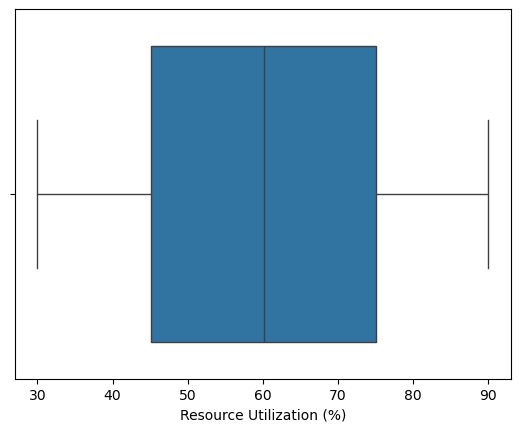

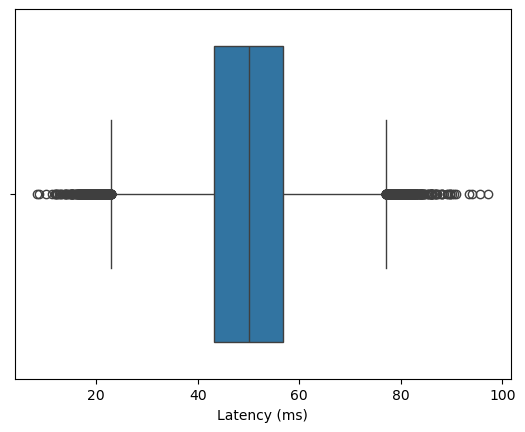

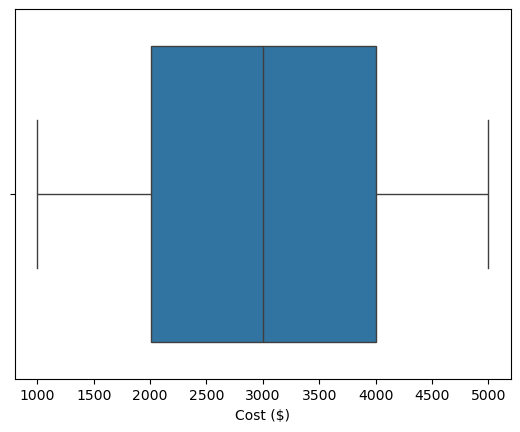

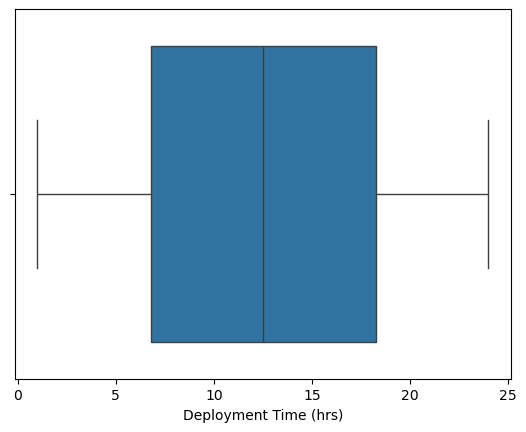

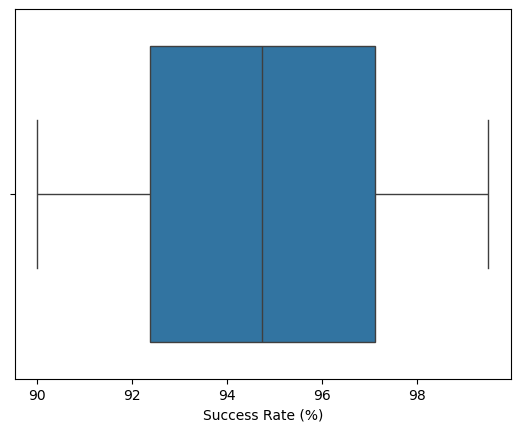

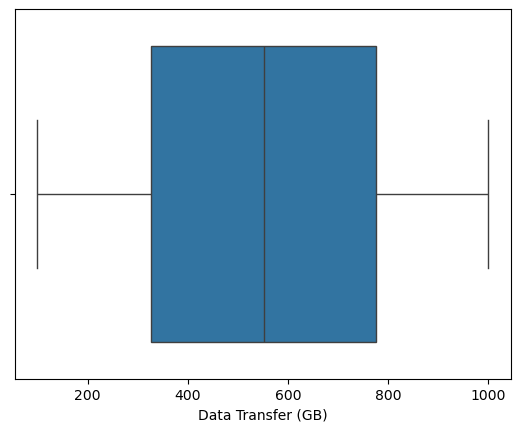

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data, x=i)
    plt.show()

The following two blocks of code are to check how many outliers exist outside of the range shown in the graph above. The `query` method helps selecting rows on a certain condition, in this case we queried for the outliers- which are outside of the range shown above.

In [16]:
lower_outliers = data.query('`Latency (ms)` < 25')
len(lower_outliers)

833

In [17]:
upper_outliers = data.query('`Latency (ms)` > 75')
len(upper_outliers)

819

Removing or keeping the outliers causes no significant change in the outcome of the models which we later use. We'll simply remove them to reduce the amount of rows to process.

In [18]:
print(f"Row count BEFORE deleting outliers: {data.shape[0]}")
data = data.query('`Latency (ms)` >= 25 and `Latency (ms)` <= 75')
print(f"Row count AFTER deleting outliers: {data.shape[0]}")

Row count BEFORE deleting outliers: 133515
Row count AFTER deleting outliers: 131863


# Correlation Analysis

In order to look for linear correlations, we made use of a heatmap

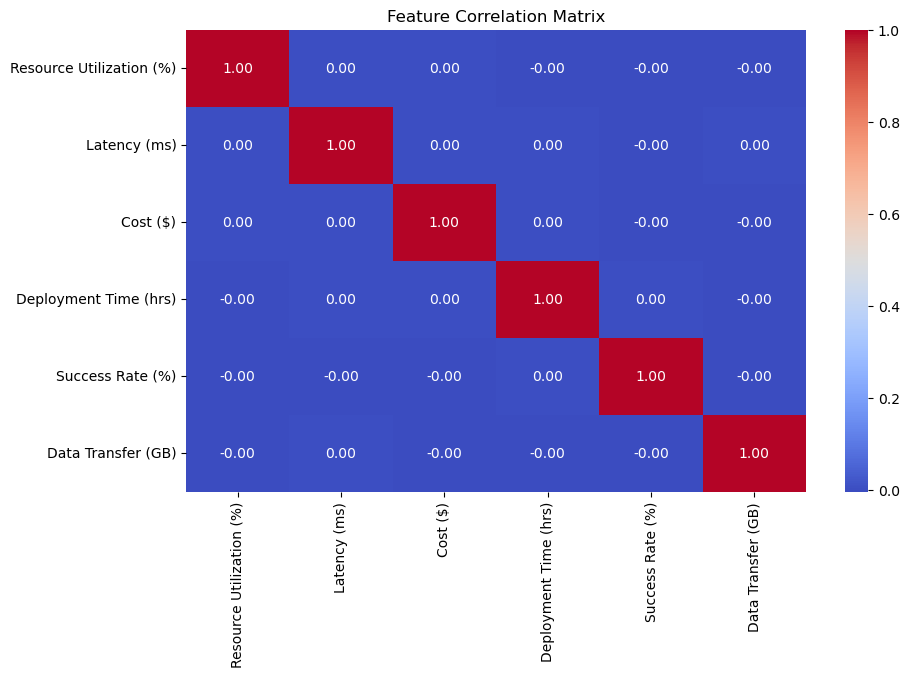

Correlation with Latency:
Latency (ms)                1.000000
Data Transfer (GB)          0.002488
Cost ($)                    0.002339
Deployment Time (hrs)       0.000797
Resource Utilization (%)    0.000153
Success Rate (%)           -0.003181
Name: Latency (ms), dtype: float64


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_exclude = [
    'Micro_Service A', 'Micro_Service B', 'Micro_Service C', 
    'Micro_Service D', 'Micro_Service E', 'Provider_AWS', 
    'Provider_Azure', 'Provider_Google', 'Provider_IBM', 
    'Reg_Asia-Pacific', 'Reg_EU-West', 'Reg_US-East', 'Reg_US-West'
]

data_filtered = data.drop(columns=columns_to_exclude)

correlation_matrix = data_filtered.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

response_corr = data_filtered.corr()['Latency (ms)'].sort_values(ascending=False)

print("Correlation with Latency:")
print(response_corr)


# Normalizing
This step is where we normalize the data, to avoid the "larger-value" bias where the model assumes larger numerical values to be of higher importance.

In [20]:
data.head()

,Resource Utilization (%),Latency (ms),Cost ($),Deployment Time (hrs),Success Rate (%),Data Transfer (GB),Micro_Service A,Micro_Service B,Micro_Service C,Micro_Service D,Micro_Service E,Provider_AWS,Provider_Azure,Provider_Google,Provider_IBM,Reg_Asia-Pacific,Reg_EU-West,Reg_US-East,Reg_US-West
1,85.06,52.45,4580.71,14.86,98.20,115.22,False,False,True,False,False,False,False,True,False,True,False,False,False
12,85.66,65.55,3626.46,19.22,95.43,278.92,False,True,False,False,False,False,False,True,False,False,False,True,False
13,52.13,48.22,4074.66,3.46,92.97,466.39,True,False,False,False,False,False,True,False,False,False,False,False,True
18,38.83,41.07,1897.86,15.38,94.47,773.88,False,False,True,False,False,False,True,False,False,False,False,True,False
22,58.04,54.38,4420.02,16.19,97.41,564.84,True,False,False,False,False,False,False,True,False,True,False,False,False


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = [
    'Latency (ms)',
    'Resource Utilization (%)',
    'Cost ($)',
    'Deployment Time (hrs)',
    'Success Rate (%)',
    'Data Transfer (GB)'
]

scaled_column_names = [
    'SC_Latency',
    'SC_Resource_utilization',
    'SC_Cost',
    'SC_Deployment_Time',
    'SC_Success_Rate',
    'SC_Data_Transfer'
]

data[scaled_column_names] = scaler.fit_transform(data[columns_to_scale])
data = data.drop(columns=columns_to_scale)

data.head()


,Micro_Service A,Micro_Service B,Micro_Service C,Micro_Service D,Micro_Service E,Provider_AWS,Provider_Azure,Provider_Google,Provider_IBM,Reg_Asia-Pacific,Reg_EU-West,Reg_US-East,Reg_US-West,SC_Latency,SC_Resource_utilization,SC_Cost,SC_Deployment_Time,SC_Success_Rate,SC_Data_Transfer
1,False,False,True,False,False,False,False,True,False,True,False,False,False,0.254690,1.443190,1.367556,0.353915,1.260330,-1.677772
12,False,True,False,False,False,False,False,True,False,False,False,True,False,1.628886,1.477841,0.540693,1.011123,0.250842,-1.047619
13,True,False,False,False,False,False,True,False,False,False,False,False,True,-0.189039,-0.458550,0.929061,-1.364472,-0.645672,-0.325965
18,False,False,True,False,False,False,True,False,False,False,False,True,False,-0.939077,-1.226638,-0.957148,0.432298,-0.099017,0.857698
22,True,False,False,False,False,False,False,True,False,True,False,False,False,0.457148,-0.117242,1.228317,0.554394,0.972425,0.053012


## Plot relationship between various columns and the response variable `Latency Category`

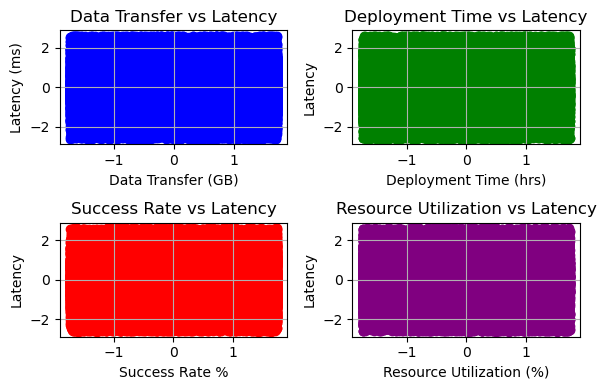

In [22]:
fig, grid = plt.subplots(2, 2, figsize=(6, 4))

grid[0, 0].scatter(data['SC_Data_Transfer'], data['SC_Latency'], color='blue')
grid[0, 0].set_title('Data Transfer vs Latency')
grid[0, 0].set_xlabel('Data Transfer (GB)')
grid[0, 0].set_ylabel('Latency (ms)')
grid[0, 0].grid(True)

grid[0, 1].scatter(data['SC_Deployment_Time'], data['SC_Latency'], color='green')
grid[0, 1].set_title('Deployment Time vs Latency')
grid[0, 1].set_xlabel('Deployment Time (hrs)')
grid[0, 1].set_ylabel('Latency')
grid[0, 1].grid(True)

grid[1, 0].scatter(data['SC_Success_Rate'], data['SC_Latency'], color='red')
grid[1, 0].set_title('Success Rate vs Latency')
grid[1, 0].set_xlabel('Success Rate %')
grid[1, 0].set_ylabel('Latency')
grid[1, 0].grid(True)

grid[1, 1].scatter(data['SC_Resource_utilization'], data['SC_Latency'], color='purple')
grid[1, 1].set_title('Resource Utilization vs Latency')
grid[1, 1].set_xlabel('Resource Utilization (%)')
grid[1, 1].set_ylabel('Latency')
grid[1, 1].grid(True)

plt.tight_layout()
plt.show()


# What is known so far

As observed in the correlation matrix and scatterplots above, there's no significant linear correlation between the latency and existing features. With that in mind, we will try to look for ways of capturing non-linear relationships between features & the response variable.

# DecisionTreeRegressor

In an attempt to capture a more complex, non-linear relationship, we constructed a decision tree regression model in order to see whether it would fit the data meaningfully. But unfortunately, the accuracy for both the training and test sets were very low, meaning that the model failed to capture a meaningful relationship in the data.

The results were very low, cross validation `[-0.029 -0.038 -0.03]`, R^2 `-0.02` which indicates that the DecisionTreeRegressor failed to capture any meaningful pattern/relations in the data to make accurate predictions.

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y = data['SC_Latency'] 
X = data.drop(columns=['SC_Latency'], axis=1)

X_train,\
X_test,\
y_train,\
y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtr = DecisionTreeRegressor(max_depth=10, random_state=42)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

train_accuracy = dtr.score(X_train, y_train)
test_accuracy = dtr.score(X_test, y_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"{'Training Accuracy:':<20}", train_accuracy)
print(f"{'Test Accuracy:':<20}", test_accuracy)

cv_scores = cross_val_score(dtr, X_train, y_train, cv=3)

print()
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Training Accuracy:   0.020923840768117152
Test Accuracy:       -0.02050996101725966

Cross-validation scores: [-0.02862647 -0.03677091 -0.03050161]
Mean cross-validation score: -0.03196632849371298
Mean Squared Error: 1.0191676553576696
R-squared: -0.02050996101725966


# GridSearch + DecisionTreeRegressor + Freature Importance

We have attempted to apply grid search to find a best-set of parameters, hoping for some improvement. However, this did not improve the accuracy of the model either.

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (neg MSE):", grid_search.best_score_)


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation score (neg MSE): -1.0039142347477736


### Freature Importance

According to the tuned DecisionTreeRegressor model's feature importance graph, "Data Transfer" is of highest importance. This makes sense because the amount of time it would take for a service to complete a task would depend on how much data it has to process ( among other factors, such as how much resources are available to the service )

After that comes cost, which might have a predictive power in terms of the quality of service that the provider gives for a certain price. For example, providers usually offer higher-cost-better alternatives aside from lower-cost-limited alternatives where lower-cost-limited ones are prone to being queued, put in systematic-hibernation, or traffic congestion.

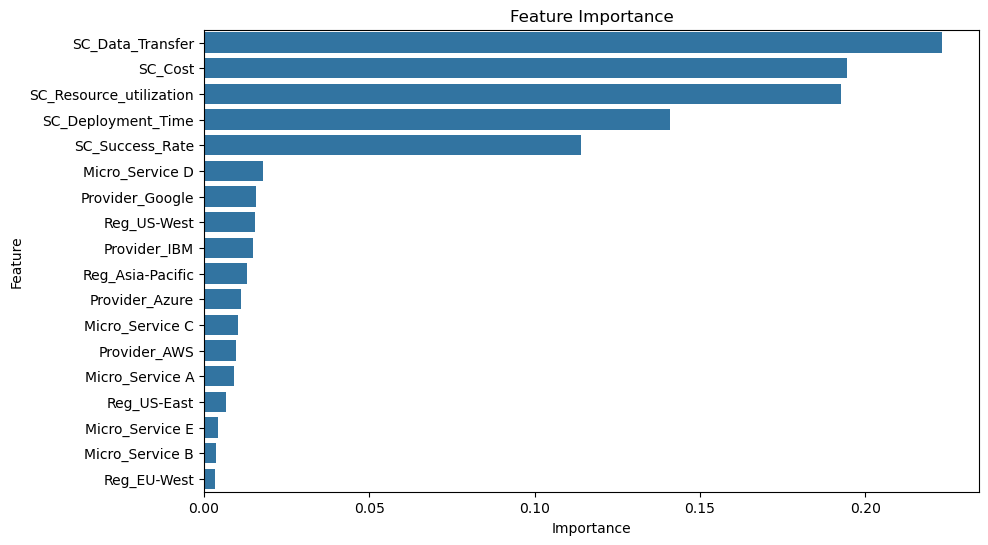

In [25]:
import seaborn as sns

feature_importances = dtr.feature_importances_

feature_importance_data = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_data)
plt.title('Feature Importance')
plt.show()


### Selecting features with importance greater than a threshold 0.1

In [26]:
important_features = feature_importance_data[feature_importance_data['Importance'] > 0.1]['Feature']

X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

### Re-train the DecisionTreeRegressor


In [27]:
dtr_important = DecisionTreeRegressor(
    max_depth=grid_search.best_params_.get('max_depth'),
    min_samples_split=grid_search.best_params_.get('min_samples_split'),
    min_samples_leaf=grid_search.best_params_.get('min_samples_leaf'),
    random_state=42
)

dtr_important.fit(X_train_important, y_train)

train_score_important = dtr_important.score(X_train_important, y_train)
print("Training set score with important features:", train_score_important)

test_score_important = dtr_important.score(X_test_important, y_test)
print("Test set score with important features:", test_score_important)

y_pred_important = dtr_important.predict(X_test_important)

mse_test_important = mean_squared_error(y_test, y_pred_important)
print("Test MSE with important features:", mse_test_important)


Training set score with important features: 0.002123231587636165
Test set score with important features: -0.0025536737255880126
Test MSE with important features: 1.0012349864793182


# RandomForestRegressor

We tried training a random forest regression model, hoping for better scores. However, it turned out that this model also failed to generalize well even tho the training score was quite high. Test scores turned out to be significantly low.

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

sample = data.sample(frac=0.05)

X = sample.drop(columns=['SC_Latency'])
y = sample['SC_Latency']

X_train,\
X_test,\
y_train,\
y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("Random forest training score:", train_score)
print("Random forest test score:", test_score)
print("Random forest test MSE:", test_mse)
print("Random forest test R^2:", test_r2)


Random forest training score: 0.8545999259365611
Random forest test score: -0.06222730457036896
Random forest test MSE: 0.9826824089609631
Random forest test R^2: -0.06222730457036896


# PolynomialFeatures + RandomForestRegressor

As a last option, we combined polynomial features and random forest regressor. However, there were no improvements in the scores.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

# Assume we are initially using all features to explore polynomial features
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_transformer.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model_poly = RandomForestRegressor(random_state=42, n_jobs=-1)
model_poly.fit(X_train_poly, y_train)

feature_importances = model_poly.feature_importances_

feature_names_poly = poly_transformer.get_feature_names_out(input_features=X.columns)

importances = pd.DataFrame({'Feature': feature_names_poly, 'Importance': feature_importances})
important_features_poly = importances.sort_values(by='Importance', ascending=False).head(10)
print(important_features_poly)


                                        Feature  Importance
178    SC_Resource_utilization SC_Data_Transfer    0.028579
184          SC_Deployment_Time SC_Success_Rate    0.028539
179                                   SC_Cost^2    0.027945
177     SC_Resource_utilization SC_Success_Rate    0.027586
186                           SC_Success_Rate^2    0.027556
180                  SC_Cost SC_Deployment_Time    0.027229
182                    SC_Cost SC_Data_Transfer    0.027193
174                   SC_Resource_utilization^2    0.027173
176  SC_Resource_utilization SC_Deployment_Time    0.027055
175             SC_Resource_utilization SC_Cost    0.026554


### Filter to include only the 10 top important polynomial features

In [31]:
top_features_indices = important_features_poly.index[:10]
X_train_important_poly = X_train_poly[:, top_features_indices]
X_test_important_poly = X_test_poly[:, top_features_indices]

### Retrain the model on just the selected important polynomial features

In [32]:
model_important_poly = RandomForestRegressor(random_state=42, n_jobs=-1)
model_important_poly.fit(X_train_important_poly, y_train)

train_score_important = model_important_poly.score(X_train_important_poly, y_train)
test_score_important = model_important_poly.score(X_test_important_poly, y_test)
y_pred_important = model_important_poly.predict(X_test_important_poly)

test_mse_important = mean_squared_error(y_test, y_pred_important)
test_r2_important = r2_score(y_test, y_pred_important)

print("Training score with important poly features:", train_score_important)
print("Test score with important poly features:", test_score_important)
print("Test MSE with important poly features:", test_mse_important)
print("Test R^2 with important poly features:", test_r2_important)


Training score with important poly features: 0.8546087076835442
Test score with important poly features: -0.057606088950336476
Test MSE with important poly features: 0.9784072530896327
Test R^2 with important poly features: -0.057606088950336476


# Conclusion

We began this project with the goal of analyzing latency variations across different geographic regions and cloud providers which we believed would help us build models that could predict such information. We began by preprocessing the data, cleaning and transforming as needed such as handling missing values, lookgin for duplicates and encoding categorical features. It turned out that the correlation analysis showed no significant linear-relationships between the latency and other existing features, which gave us the idea that there might be non-linear, complex relations between features. For that reason, we attempted to capture complex relationships in the data by using DecisionTreeRegressor, DecisionTreeRegressor + GridSearch tuning, RandomForestRegressor, RandomForestRegressor + PolyFeatures. However, the models that we used have failed to generalize well on the test sets unlike the training sets.

The feature-importances gave the idea that "resource utilization", "cost" and "data transfer" might have some predictive power but the models weren't able to make useful predictions which indicates that the dataset is missing other important data which would be related to the latency. For example, network congestion, local link conditions or perhaps retransmission attempts between networks.

We have come to the conclusion that the current dataset is not enough to make meaningful predictions for latency variations between services. As for possible future work, it would be useful to gather more types of data such as the state of local network/links, bandwidth capacity, and more - which could improve prediction rates for the models mentioned above.
